# Microsoft Movie Analysis

**Authors:** Elena Burlando


## Overview

The objective of this project is to analyze movie data to provide insights on movie types that have performed best in the past decade. 

As an outcome of this analysis we are hoping to get: 
* Top 10 most produced genres during 2010-2019 (by entry count).
* Top 2 most produced genres for each year (by entry count).
* Top 10 most popular genres during 2010-2019 (by number of votes). 
* Top 2 most popular genres for each year (by number of votes).
* Top 10 highest rated genres during 2010-2019.
* Top 10 highest rated movies during 2010-2019.
* Top 2 highest rated movies for each year. 
* Correlation between ratings and number of votes. 
* Movies/genres with the highest domestic gross income. 
* Movies/genres with the highest foreign gross income.
* Correlation between domestic and foreign gross income.
* Movies/genres with the highest ROI (return on investment). 

(A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.)

## Business Problem

Microsoft following the success of other big tech companies is considering setting up a movie studio. This project is aiming to provide valuable information to the head of Microsoft's new movie department in the areas of movies, genres, and ROI. 

***
One of the main business pain points related to this project is lack of experince in the movie industry and using 
data from other sources since it doesn't have any of its own. I picked the questions above as I think the answers to those would be the most beneficial when starting from scratch. They will provide high level overview of the industry and trends. 
***

## Data Understanding

For this project we will be using data from imdb and tn sources. Variables included: movie titles, release year, genres, runtime minutes, ratings, number of votes, and gross income (domestic and foreign) made of movies from 2010 through 2019.
***
* Using these sources we would be able to answer our questions listed above. 
* The target variables are the top performing movie titles and genres. 
* We intend to use max and mean of variables. 
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### During Data Understanding stage we will read and preview our data sources. 
*** 
We will be using these methods for each dataset:
* read
* shape 
* info
* describe
***

## imdb_title_basics dataset

In [54]:
imdb_title_basics=pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_basics.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [3]:
imdb_title_basics.shape

(146144, 6)

In [4]:
imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [5]:
imdb_title_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


*** 
#### Data Cleaning tasks for imdb_title_basics: 
* 'original_title' has 21 null values
* 'runtime_minutes' has 31,739 null values (disregard: we won't need this data)
* 'genres' has 5,408 null values
***

## imdb_title_ratings dataset


In [6]:
imdb_title_ratings=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_title_ratings.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [7]:
imdb_title_ratings.shape

(73856, 3)

In [8]:
imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [9]:
imdb_title_ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


***
#### Data Cleaning tasks for imdb_title_ratings: 
* none
***

## bom_movie_gross dataset


In [10]:
bom_movie_gross=pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_movie_gross.head() 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [11]:
bom_movie_gross.shape

(3387, 5)

In [12]:
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [56]:
# Descibe method needs to be rerun in data cleaning stage after converting column 'foregn_gross' to float. 
bom_movie_gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


***
#### Data Cleaning tasks for bom_movie_gross: 
    * 'studio' has 5 null values
    * 'domestic_gross' has 28 null values
    * 'foreign_gross' has 1,350 null values and needs to be converted to float
***

## Budget dataset

In [14]:
tn_movie_budgets=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movie_budgets.head() 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
tn_movie_budgets.shape

(5782, 6)

In [16]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [55]:
# needs to rerun it after cleaning up data. We will convert columns: production_budget, domestic_gross, and 
# worldwide_gross to floats.  
tn_movie_budgets.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


***
#### Data Cleaning tasks for tn_movie_budgets: 
    * 'production_budget' needs to be converted to float
    * 'domestic_gross' needs to be converted to float
    * 'worldwide_gross' needs to be converted to float
***

## Cleaning up data

In [18]:
bom_movie_gross_dropped_na = bom_movie_gross.dropna()

In [19]:
bom_movie_gross_dropped_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [20]:
bom_movie_gross_dropped_na.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [21]:
bom_movie_gross_dropped_na['foreign_gross'] = bom_movie_gross_dropped_na['foreign_gross'].str.replace(',', '', regex=True)

<ipython-input-21-b3c99fdef75b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movie_gross_dropped_na['foreign_gross'] = bom_movie_gross_dropped_na['foreign_gross'].str.replace(',', '', regex=True)


In [22]:
bom_movie_gross_dropped_na['foreign_gross'] = bom_movie_gross_dropped_na['foreign_gross'].astype(float)

<ipython-input-22-005ff372db55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bom_movie_gross_dropped_na['foreign_gross'] = bom_movie_gross_dropped_na['foreign_gross'].astype(float)


In [23]:
bom_movie_gross_dropped_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


In [24]:
bom_movie_gross_dropped_na.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [25]:
# Here you run your code to clean the data

# Merginng two dataframes: imdb_title_basics and imdb_title_ratings on common column 'tconst'. 
#It will be easier to parse through information once two dfs are combined. 

In [26]:
imdb_title_raiting_basics_df = imdb_title_basics.merge(imdb_title_ratings, on="tconst", how="inner")
imdb_title_raiting_basics_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [27]:
imdb_title_raiting_basics_df.shape

(73856, 8)

In [28]:
imdb_title_raiting_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [29]:
#basic stats
imdb_title_raiting_basics_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [30]:
#df with over 100 reviews per movie
imdb_df_over_100_votes = imdb_title_raiting_basics_df.loc[imdb_title_raiting_basics_df['numvotes'] > 100]
imdb_df_over_100_votes

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
10,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120
...,...,...,...,...,...,...,...,...
73840,tt9904844,Ott Tänak: The Movie,Ott Tänak: The Movie,2019,125.0,Documentary,8.7,218
73841,tt9905412,Ottam,Ottam,2019,120.0,Drama,8.1,505
73842,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600
73849,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365


# Merging bom_movie_gross and imdb_title_raiting_basics_df

In [31]:
bom_movie_gross.rename(columns={'title':'original_title'}, inplace=True)
bom_movie_gross.head()

,original_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [32]:
#merging bom_movie_gross and imdb_title_raiting_basics_df
imdb_title_raiting_basics_gross_df = imdb_title_raiting_basics_df.merge(bom_movie_gross, on="original_title", \
                                                                        how="inner")
imdb_title_raiting_basics_gross_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013


In [33]:
imdb_title_raiting_basics_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2447 entries, 0 to 2446
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           2447 non-null   object 
 1   primary_title    2447 non-null   object 
 2   original_title   2447 non-null   object 
 3   start_year       2447 non-null   int64  
 4   runtime_minutes  2402 non-null   float64
 5   genres           2443 non-null   object 
 6   averagerating    2447 non-null   float64
 7   numvotes         2447 non-null   int64  
 8   studio           2444 non-null   object 
 9   domestic_gross   2429 non-null   float64
 10  foreign_gross    1573 non-null   object 
 11  year             2447 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 248.5+ KB


## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [34]:
# Here you run your code to model the data


In [35]:
#list of 2019 movies 
imdb_2019_movies = imdb_title_raiting_basics_df.loc[imdb_title_raiting_basics_df['start_year']==2019, 'genres']
imdb_2019_movies

1                Biography,Drama
21                         Drama
26                   Documentary
94       Action,Adventure,Sci-Fi
106         Comedy,Drama,Romance
                  ...           
73850                Documentary
73851                Documentary
73852               Drama,Family
73854                        NaN
73855                Documentary
Name: genres, Length: 2180, dtype: object

In [36]:
imdb_2019_movies.unique()

array(['Biography,Drama', 'Drama', 'Documentary',
       'Action,Adventure,Sci-Fi', 'Comedy,Drama,Romance',
       'Action,Adventure,Comedy', 'Animation,Family,Fantasy',
       'Biography,Comedy,Drama', 'Horror,Mystery,Thriller',
       'Comedy,Horror,Sci-Fi', 'Action,Biography,Drama', nan,
       'Action,Comedy,Horror', 'Horror', 'Comedy,Fantasy',
       'Drama,Romance', 'Comedy', 'Action,Crime', 'Romance', 'Family',
       'Drama,Family', 'Comedy,Drama', 'Drama,Mystery',
       'Adventure,Fantasy', 'Documentary,Drama', 'Biography,Drama,Family',
       'Thriller', 'Adventure,Animation,Fantasy', 'Comedy,Romance',
       'Horror,Thriller', 'Action', 'Mystery', 'Action,Adventure,History',
       'Comedy,Horror', 'Animation,Family', 'Action,Thriller',
       'Comedy,Drama,Family', 'Drama,Fantasy,Horror', 'Musical',
       'Comedy,Documentary,Sport', 'Documentary,Music', 'Crime,Drama',
       'Documentary,History,War', 'Comedy,Crime', 'Comedy,Family',
       'Crime,Documentary,Drama', 'Act

In [37]:
imdb_2019_movies_above_1 = imdb_2019_movies.value_counts()
imdb_2019_movies_above_1.iloc[:10]

Drama              392
Documentary        333
Comedy             213
Comedy,Drama       107
Thriller            77
Horror              75
Comedy,Romance      41
Horror,Thriller     38
Drama,Romance       37
Action              29
Name: genres, dtype: int64

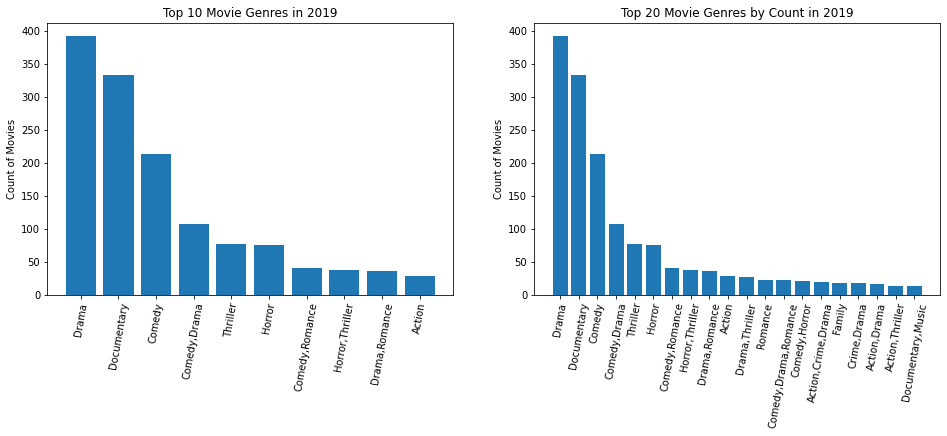

In [38]:
# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = imdb_2019_movies.value_counts()
top_10_counts = value_counts.iloc[:10]
top_20_counts = value_counts.iloc[:20]

# Plot data
ax1.bar(top_10_counts.index, top_10_counts.values)
ax2.bar(top_20_counts.index, top_20_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=80)
ax2.tick_params(axis="x", labelrotation=80)
ax1.set_ylabel("Count of Movies")
ax2.set_ylabel("Count of Movies")
ax1.set_title("Top 10 Movie Genres in 2019")
ax2.set_title("Top 20 Movie Genres by Count in 2019");

In [39]:
# Top rated movies in 2010-2019 based on the max number of votes
imdb_numvotes = imdb_title_raiting_basics_df.groupby(['genres']).max().sort_values('numvotes', ascending=False)
imdb_numvotes

,tconst,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes
genres,,,,,,,
"Action,Adventure,Sci-Fi",tt9301884,Zombie Ninjas vs Black Ops,Zombie Ninjas vs Black Ops,2019,181.0,9.0,1841066
"Action,Thriller",tt9479454,Zombies Have Fallen,À l'aveugle,2019,183.0,8.5,1387769
"Adventure,Drama,Sci-Fi",tt7853292,The V: Sacrifice of the Constellations,The V: Sacrifice of the Constellations,2019,169.0,9.2,1299334
"Drama,Western",tt9144530,Walden: Life in The Woods,Walden: Life in The Woods,2018,165.0,8.9,1211405
"Biography,Crime,Drama",tt8553134,Winnerz,Winnerz,2019,180.0,8.5,1035358
...,...,...,...,...,...,...,...
"History,Sport",tt5903964,The Long Count Teaser,The Long Count Teaser,2016,NaN,9.2,5
"Crime,Western",tt2507106,The Reaping Men,The Reaping Men,2010,105.0,6.4,5
"Horror,Musical,Romance",tt4194328,143 Hyderabad,143 Hyderabad,2013,NaN,5.2,5


In [40]:
imdb_numvotes.numvotes.iloc[:10]

genres
Action,Adventure,Sci-Fi     1841066
Action,Thriller             1387769
Adventure,Drama,Sci-Fi      1299334
Drama,Western               1211405
Biography,Crime,Drama       1035358
Mystery,Thriller            1005960
Action,Adventure,Comedy      948394
Action,Adventure,Fantasy     784780
Drama,Mystery,Thriller       761592
Adventure,Family,Fantasy     719629
Name: numvotes, dtype: int64

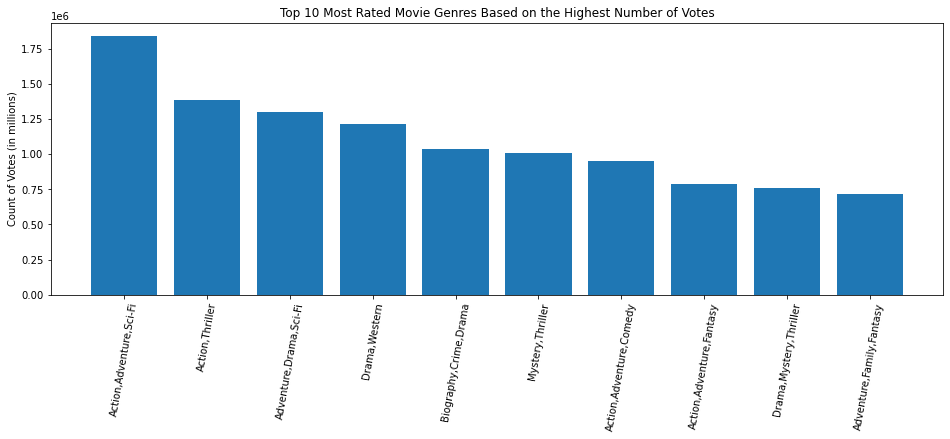

In [41]:
fig, ax = plt.subplots(figsize=(16, 5))

# Create variables for easier reuse
value_counts = imdb_numvotes.numvotes
top_10_numvotes = value_counts.iloc[:10]

# Plot data
ax.bar(top_10_numvotes.index, top_10_numvotes.values)

# Customize appearance
ax.tick_params(axis="x", labelrotation=80)
ax.set_ylabel("Count of Votes (in millions)")
ax.set_title("Top 10 Most Rated Movie Genres Based on the Highest Number of Votes");

In [42]:
#Most popular movie genres in 2010-2019 based on Average number of votes
imdb_numvotes_mean = imdb_title_raiting_basics_df.groupby(['genres']).mean().sort_values('numvotes', ascending=False)
imdb_numvotes_mean.iloc[:10]

,start_year,runtime_minutes,averagerating,numvotes
genres,,,,
"Action,Adventure,Sci-Fi",2014.559055,108.569106,5.655906,181285.417323
"Adventure,Mystery,Sci-Fi",2013.500000,105.500000,5.075000,135042.500000
"Action,Fantasy,War",2016.000000,102.000000,6.400000,131509.000000
"Adventure,Drama,Sci-Fi",2014.800000,104.300000,6.170000,99316.950000
"Action,Adventure,Fantasy",2014.533981,108.320000,5.371845,93775.563107
"Biography,Drama,Thriller",2014.818182,113.238095,6.504545,84506.909091
"Action,Crime,Sci-Fi",2013.500000,105.375000,5.875000,78214.125000
"Action,Adventure,Thriller",2014.240000,110.173913,5.628000,74964.800000
"Action,Adventure,Mystery",2013.545455,106.555556,5.563636,66149.272727


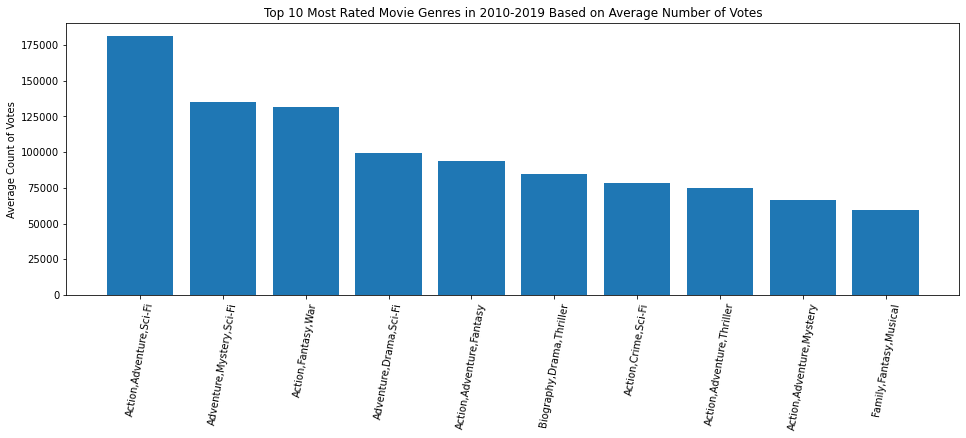

In [43]:
fig, ax = plt.subplots(figsize=(16, 5))

# Create variables for easier reuse
value_counts = imdb_numvotes_mean.numvotes
top_10_numvotes_mean = value_counts.iloc[:10]

# Plot data
ax.bar(top_10_numvotes_mean.index, top_10_numvotes_mean.values)

# Customize appearance
ax.tick_params(axis="x", labelrotation=80)
ax.set_ylabel("Average Count of Votes")
ax.set_title("Top 10 Most Rated Movie Genres in 2010-2019 Based on Average Number of Votes");

In [44]:
#Highest rated genres based on overall average rating. 
imdb_highest_rated = imdb_title_raiting_basics_df.groupby(['genres'], sort=False).mean().sort_values('averagerating', ascending=False)
imdb_highest_rated.iloc[:10]

,start_year,runtime_minutes,averagerating,numvotes
genres,,,,
"Comedy,Documentary,Fantasy",2015.0,70.0,9.4,5.0
"Documentary,Family,Musical",2017.0,59.0,9.3,19.0
"History,Sport",2016.0,NaN,9.2,5.0
"Music,Mystery",2012.0,NaN,9.0,5.0
Game-Show,2013.0,130.0,9.0,7.0
"Drama,Short",2018.0,18.0,8.8,8.0
"Documentary,News,Sport",2017.0,85.0,8.8,25.0
"Comedy,Drama,Reality-TV",2016.0,NaN,8.8,15.0
"Drama,Fantasy,War",2016.0,NaN,8.8,22.0


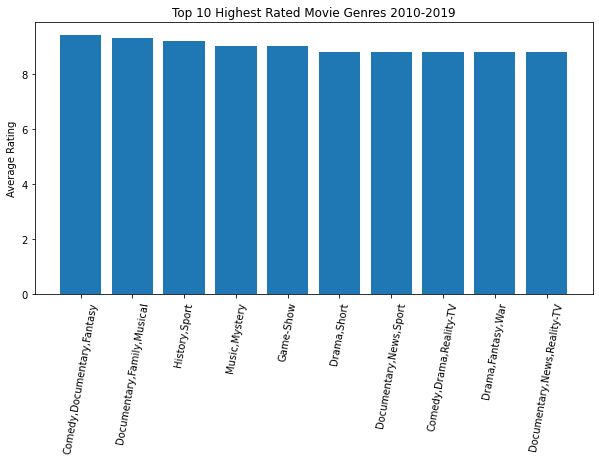

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))

# Create variables for easier reuse
value_counts = imdb_highest_rated.averagerating
top_10_highest_rating = value_counts.iloc[:10]

# Plot data
ax.bar(top_10_highest_rating.index, top_10_highest_rating.values)

# Customize appearance
ax.tick_params(axis="x", labelrotation=80)
ax.set_ylabel("Average Rating")
ax.set_title("Top 10 Highest Rated Movie Genres 2010-2019");


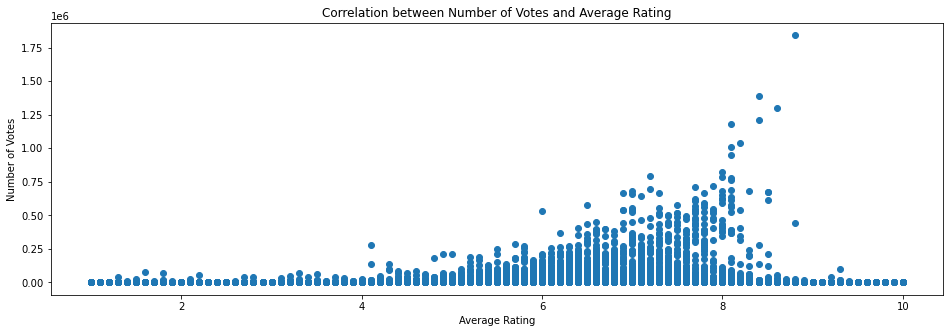

In [46]:
# Correlation between average rating and number of votes 
fig, ax = plt.subplots(figsize=(16, 5))

# Create variables for easier reuse
value_counts = imdb_title_raiting_basics_df
#top_20_highest_rating = value_counts.iloc[:20]

# Plot data
ax.scatter(x = imdb_title_raiting_basics_df.averagerating, y = imdb_title_raiting_basics_df.numvotes)

# Customize appearance
ax.tick_params(axis="x", labelrotation=0)
ax.set_xlabel("Average Rating")
ax.set_ylabel("Number of Votes")
ax.set_title("Correlation between Number of Votes and Average Rating");

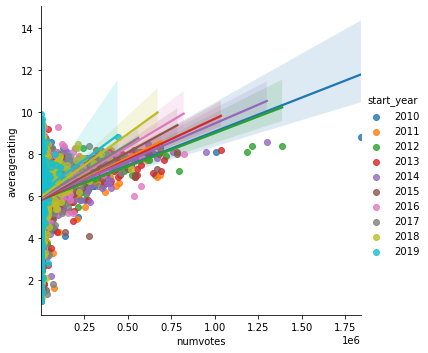

In [47]:
sns.lmplot(x="numvotes", y="averagerating", hue="start_year", data=imdb_df_over_100_votes);

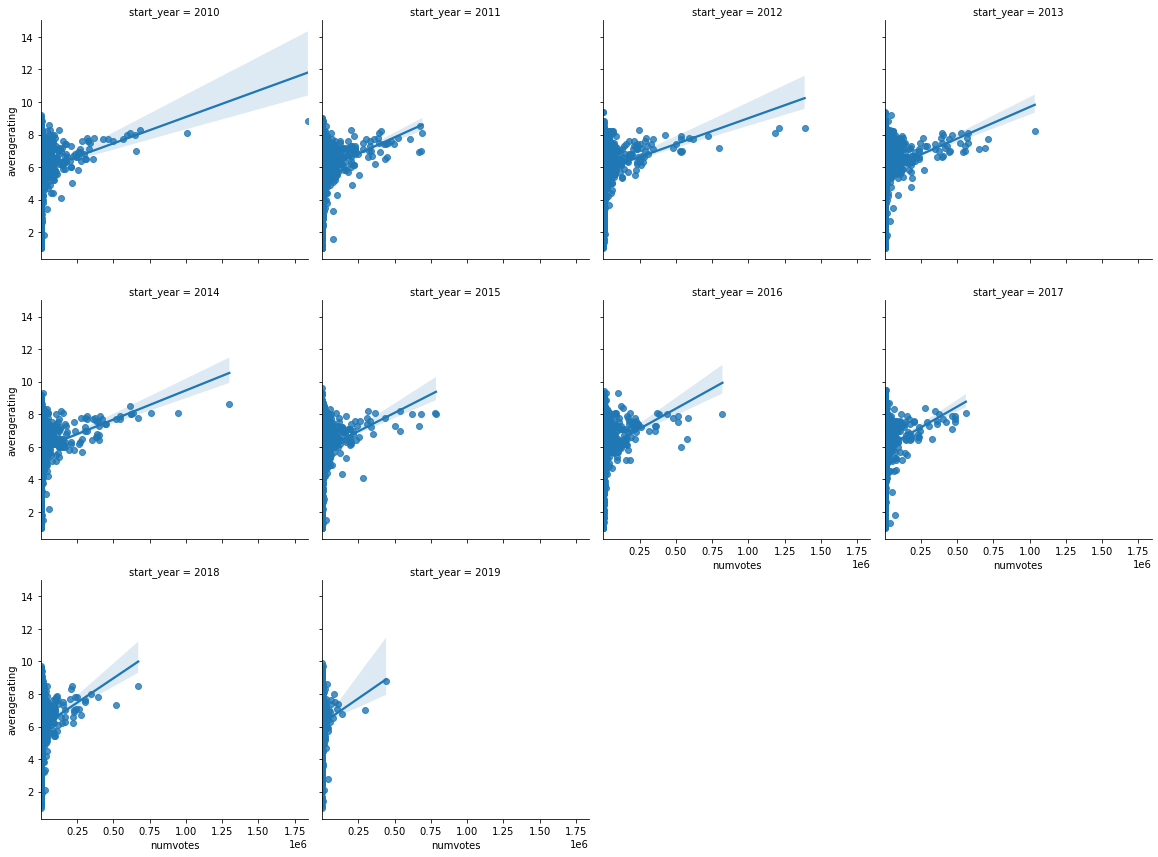

In [48]:
sns.lmplot(x="numvotes", y="averagerating", col="start_year", data=imdb_df_over_100_votes,
           col_wrap=4, height=4);

In [49]:
# Pearson Correlation
imdb_df_over_100_votes.corr()

,start_year,runtime_minutes,averagerating,numvotes
start_year,1.000000,0.062926,0.036094,-0.045646
runtime_minutes,0.062926,1.000000,0.203918,0.122532
averagerating,0.036094,0.203918,1.000000,0.137307
numvotes,-0.045646,0.122532,0.137307,1.000000


## It appears that there is little positive correlation between number of votes and average rating. 


In [50]:
# the highest rated genres per year
imdb_highest_rated_per_year = imdb_title_raiting_basics_df.groupby(['start_year', 'genres'])
                                #.sort_values('averagerating', ascending=False)
imdb_highest_rated_per_year.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73804,tt9875852,The House Elf,Domovoy,2019,90.0,"Comedy,Family,Fantasy",5.8,50
73809,tt9880724,Verdict 19,Verdict 19,2019,NaN,"Biography,Documentary,Drama",9.8,28
73827,tt9896916,The Pilgrim's Progress,The Pilgrim's Progress,2019,108.0,"Adventure,Animation,Family",7.9,61
73848,tt9910930,Jeg ser deg,Jeg ser deg,2019,75.0,"Crime,Documentary",6.1,7


In [51]:
df2= imdb_highest_rated_per_year.apply(lambda x: x.sort_values(["averagerating"]))
df2

tconst                  primary_title  \
start_year genres                                                     
2010       Action  14007   tt1949554        Hot Ice, No-one Is Safe   
                   44933   tt4324030                    Virudhagiri   
                   1385    tt1221867                        Urgency   
                   6448    tt1650433                           Sura   
                   5182    tt1595844                Hunted by Night   
...                              ...                            ...   
2019       War     73284   tt9472208                  Battalion 609   
                   59976   tt6198246                     Over There   
           Western 72344   tt9021234      The Legend of 5 Mile Cave   
                   778    tt10244910                     C- Bar, II   
                   69067   tt7941194  Bill Tilghman and the Outlaws   

                                         original_title  start_year  \
start_year genres                                                     
2010       Action  14007        Hot Ice, No-one Is Safe        2010   
                   44933                    Virudhagiri        2010   
                   1385                         Urgency        2010   
                   6448                            Sura        2010   
                   5182                 Hunted by Night        2010   
...                                                 ...         ...   
2019       War     73284                  Battalion 609        2019   
                   59976                     Over There        2019   
           Western 72344      The Legend of 5 Mile Cave        2019   
                   778                       C- Bar, II        2019   
                   69067  Bill Tilghman and the Outlaws        2019   

                          runtime_minutes   genres  averagerating  numvotes  
start_year genres                                                            
2010       Action  14007             88.0   Action            2.3        20  
                   44933            143.0   Action            2.5        17  
                   1385              90.0   Action            2.6       207  
                   6448             159.0   Action            2.7      4895  
                   5182             110.0   Action            2.9       162  
...                                   ...      ...            ...       ...  
2019       War     73284            131.0      War            4.7        49  
                   59976              NaN      War            7.5        19  
           Western 72344             90.0  Western            4.6       115  
                   778               64.0  Western            7.7         9  
                   69067              NaN  Western            8.8        16  

[73052 rows x 8 columns]

In [52]:
imdb_title_raiting_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 7.6+ MB


In [53]:
# most rated genres per year (aka most watched)
imdb_highest_rated_per_year = imdb_title_raiting_basics_df.groupby(['start_year', 'genres']).mean()\
                                .sort_values('numvotes', ascending=False)
imdb_highest_rated_per_year.iloc[:10]

runtime_minutes  averagerating  \
start_year genres                                                     
2012       Adventure,Mystery,Sci-Fi       124.000000       7.000000   
           Biography,Drama,Thriller       120.000000       7.700000   
2010       Animation,Comedy,Family         95.000000       7.700000   
2014       Adventure,Drama,Sci-Fi         109.666667       6.633333   
2012       Action,Adventure,Sci-Fi        119.625000       6.187500   
2014       Biography,Drama,Thriller       101.500000       6.700000   
2011       Action,Drama,Sci-Fi             94.333333       6.133333   
2012       Drama,History,Musical          158.000000       7.600000   
2010       Adventure,Drama,Western        110.000000       7.600000   
           Action,Adventure,Sci-Fi        100.400000       6.150000   

                                          numvotes  
start_year genres                                   
2012       Adventure,Mystery,Sci-Fi  538720.000000  
           Biography,Drama,Thriller  534683.000000  
2010       Animation,Comedy,Family   464511.000000  
2014       Adventure,Drama,Sci-Fi    433136.666667  
2012       Action,Adventure,Sci-Fi   371700.625000  
2014       Biography,Drama,Thriller  310646.500000  
2011       Action,Drama,Sci-Fi       308612.666667  
2012       Drama,History,Musical     285971.000000  
2010       Adventure,Drama,Western   284034.000000  
           Action,Adventure,Sci-Fi   269994.000000

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***